# Real Estate Price Forecasting
#### Capstone in Data Science  - Dr Chaojie (Jay) Wang
#### Author: Sai Teja Gunamoni

## Problem Statement

To precisely forecast the cost of real estate properties by taking into account a specific set of parameters, including size, location, number of bedrooms, and other pertinent aspects. To help buyers, sellers, and investors make wise decisions, the objective is to create a machine learning model that can accurately represent the intricate relationships that exist between these features and the price of the property.

Feature variables: 

|feature_name|feature_descriptions|
|-------------|-----------------|
|1. cid| a notation for a house|
|2. dayhours| Date house was sold|
|3. price| Price is prediction target|
|4. room_bed|Number of Bedrooms/House|
|5. room_bath| Number of bathrooms/bedrooms|
|6. living_measure| square footage of the home|
|7. lot_measure| square footage of the lot|
|8. ceil| Total floors (levels) in house|
|9. coast| House which has a view to a waterfront|
|10. sight| Has been viewed|
|11. condition| How good the condition is (Overall)|
|12. quality| grade given to the housing unit, based on grading system|
|13. ceil_measure| square footage of house apart from basement|
|14. basement_measure| square footage of the basement|
|15. yr_built| Built Year|
|16. yr_renovated| Year when house was renovated|
|17. zipcode| zip|
|18. lat| Latitude coordinate|
|19. long| Longitude coordinate|
|20. living_measure15| Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area|
|21. lot_measure15| lotSize area in 2015(implies-- some renovations)|
|22. furnished| Based on the quality of room|
|23. total_area| Measure of both living and lot|

## Importing the Libraries

In [1]:
# Importing relevant libraries in order to carry out the analysis

import random
import datetime
import warnings
import collections
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

## Loading the Dataset

In [2]:
df = pd.read_excel("House_Price_Details.xlsx")

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

The dataset consists of 21613 rows, 22 input columns, and one output column (price).

The **price** is going to be the dependent variable which is influenced by other variables like number of bedrooms,bathrooms, ceil,etc.

In [4]:
df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [5]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [6]:
df.iloc[:, 14:].head()

,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [7]:
## Getting description of Numerical Features
df.describe().round(2).iloc[:,8:] 

,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,21612.00,21612.00,21613.00,21613.00,21613.00,21447.00,21584.00,21584.0
mean,1788.37,291.52,84.40,98077.94,47.56,1987.07,12766.54,0.2
std,828.10,442.58,401.68,53.51,0.14,685.52,27286.99,0.4
min,290.00,0.00,0.00,98001.00,47.16,399.00,651.00,0.0
25%,1190.00,0.00,0.00,98033.00,47.47,1490.00,5100.00,0.0
50%,1560.00,0.00,0.00,98065.00,47.57,1840.00,7620.00,0.0
75%,2210.00,560.00,0.00,98118.00,47.68,2360.00,10087.00,0.0
max,9410.00,4820.00,2015.00,98199.00,47.78,6210.00,871200.00,1.0


Based on the preliminary description of numerical features, we can conclude that the dataset contains outliers.

In [8]:
df.describe(include='all')

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,21613,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21571.0,21612.0,21556.000000,...,21612.000000,21612.0,21613.000000,21613.000000,21613.000000,21613.00,21447.000000,21584.000000,21584.000000,21584
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,7.0,3.0,NaN,...,NaN,117.0,NaN,NaN,NaN,753.00,NaN,NaN,NaN,11145
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,...,NaN,2014.0,NaN,NaN,NaN,-122.29,NaN,NaN,NaN,$
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,10647.0,21421.0,NaN,...,NaN,559.0,NaN,NaN,NaN,116.00,NaN,NaN,NaN,39
mean,4.580302e+09,NaN,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,NaN,NaN,0.234366,...,291.522534,NaN,84.402258,98077.939805,47.560053,NaN,1987.065557,12766.543180,0.196720,NaN
std,2.876566e+09,NaN,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,NaN,NaN,0.766438,...,442.580840,NaN,401.679240,53.505026,0.138564,NaN,685.519629,27286.987107,0.397528,NaN
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,98001.000000,47.155900,NaN,399.000000,651.000000,0.000000,NaN
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,98033.000000,47.471000,NaN,1490.000000,5100.000000,0.000000,NaN
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,NaN,NaN,0.000000,...,0.000000,NaN,0.000000,98065.000000,47.571800,NaN,1840.000000,7620.000000,0.000000,NaN
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,NaN,NaN,0.000000,...,560.000000,NaN,0.000000,98118.000000,47.678000,NaN,2360.000000,10087.000000,0.000000,NaN


In [9]:
df

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,203600600,20150310T000000,685530,4.0,2.50,3130.0,60467.0,2,0,0.0,...,0.0,1996,0,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597
21609,625049281,20140521T000000,535000,2.0,1.00,1030.0,4841.0,1,0,0.0,...,110.0,1939,0,98103,47.6860,-122.341,1530.0,4944.0,0.0,5871
21610,424069018,20140905T000000,998000,3.0,3.75,3710.0,34412.0,2,0,0.0,...,800.0,1978,0,98075,47.5888,-122.04,2390.0,34412.0,1.0,38122
21611,7258200055,20150206T000000,262000,4.0,2.50,1560.0,7800.0,2,0,0.0,...,0.0,1997,0,98168,47.5140,-122.316,1160.0,7800.0,0.0,9360


In [10]:
# checking for any missing values and returning their sum.
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

16 features out of 23 have null values. The dataset's null values range from 1 at the lowest to 166 at the highest, which is less than 1% of the total.

In [11]:
# Given that some of the columns contain '$' sign, the sign is regarded as a NULL value.
Dollarsign_Column = [col for col in df.columns if df[df[col] == "$"][col].count() > 0]
for col in Dollarsign_Column:
    df[col] = df[col].replace("$", np.nan)

In [12]:
continuous_columns = ["living_measure", "lot_measure", "ceil_measure", "basement", "living_measure15", "lot_measure15", "total_area"]
categorical_columns = ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "yr_built", "yr_renovated", "furnished"]
lat_long_columns = ["lat", "long"]

In [13]:
## Imputing Null Values for Categorical columns using mode values present in it
categorical_null_columns = ["room_bed", "room_bath", "sight", "ceil", "coast", "condition", "quality", "yr_built", "furnished"]
for cat_col in categorical_null_columns:
    mode_val = df[cat_col].mode()[0]
    print(f"column name : {cat_col}, mode value : {mode_val}")
    df[cat_col] = df[cat_col].fillna(mode_val)

column name : room_bed, mode value : 3.0
column name : room_bath, mode value : 2.5
column name : sight, mode value : 0.0
column name : ceil, mode value : 1.0
column name : coast, mode value : 0.0
column name : condition, mode value : 3.0
column name : quality, mode value : 7.0
column name : yr_built, mode value : 2014.0
column name : furnished, mode value : 0.0


In [14]:
## Imputing Null Values for Continuous columns using mean value present in it
coninuous_null_columns = ["living_measure", "lot_measure", "ceil_measure", "basement", "ceil_measure", "basement", "living_measure15",
                          "lot_measure15", "total_area", "long"]
                    
for num_col in coninuous_null_columns:
    mean_val = df[num_col].mean()
    print(f"column name : {num_col}, mean value : {mean_val:.0f}")
    if num_col == "long":
        df[num_col] = df[num_col].fillna(mean_val)
    else:
        df[num_col] = df[num_col].fillna(int(mean_val))

column name : living_measure, mean value : 2080
column name : lot_measure, mean value : 15105
column name : ceil_measure, mean value : 1788
column name : basement, mean value : 292
column name : ceil_measure, mean value : 1788
column name : basement, mean value : 292
column name : living_measure15, mean value : 1987
column name : lot_measure15, mean value : 12767
column name : total_area, mean value : 17192
column name : long, mean value : -122


In [15]:
df.isnull().sum() ## after imputation null value analysis

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [16]:
df.duplicated().sum()

0

There are no duplicate rows present in the dataset as a result no row is deleted.

## Data Visualizations

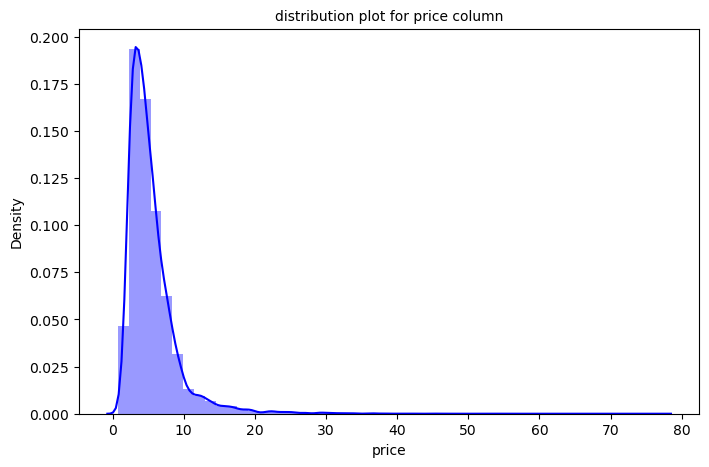

In [18]:
plt.figure(figsize=(8,5))
sns.distplot((df["price"]/100000), color="blue")
plt.title("distribution plot for price column", fontsize=10)
plt.xlabel("price", fontsize=10)
plt.show()

In [19]:
## Finding the Skewness and Kurtosis
print(f"skewness -> {df['price'].skew():.4f}")
print(f"kurtosis -> {df['price'].kurt():.4f}")

skewness -> 4.0217
kurtosis -> 34.5224


In [20]:
## Applying the Central Limit Theorem to determine whether or not the column sample means are normal

def CLT(data, total_samples, rows_in_each_sample):
    data = np.array(data)
    index_list = [random.sample(range(0, len(data)), rows_in_each_sample) for i in range(total_samples)]
    sample_means = [data[idxes].mean() for idxes in index_list]
    return sample_means

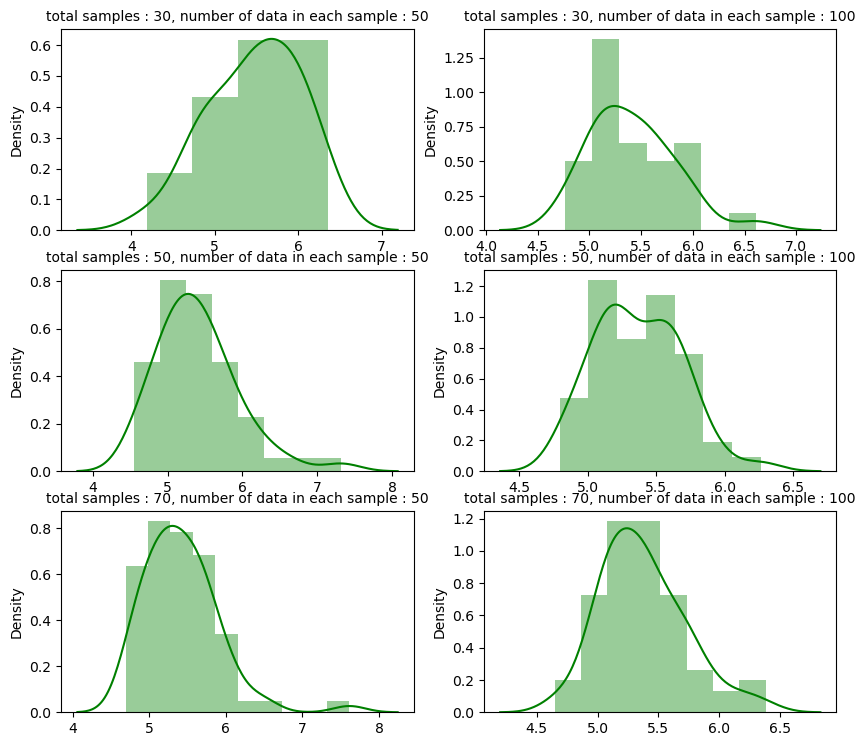

In [21]:
total_samples = [30, 30, 50, 50, 70, 70]
rows_in_each_sample = [50, 100, 50, 100, 50, 100]
fig = plt.figure(figsize=(10,12))
for idx, (sample, row_sample) in enumerate(zip(total_samples, rows_in_each_sample)):
    plt.subplot(4, 2, idx+1)
    sns.distplot(CLT(df["price"]/100000, sample, row_sample), color = "green")
    plt.title(f"total samples : {sample}, number of data in each sample : {row_sample}", fontsize=10)
plt.show()

The distribution plots of sample mean values above indicate that Central Limit Theorem is **Not true**

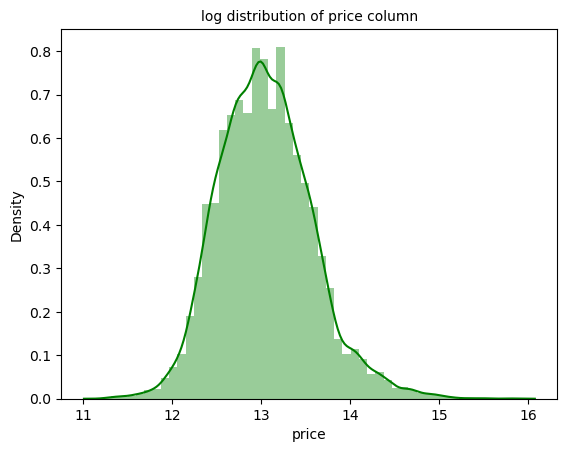

In [22]:
## Verifying the price column's log transformation to see if it will follow normality
plot = sns.distplot(np.log1p(df["price"]), color="green")
plt.title("log distribution of price column", fontsize=10)
plt.show()

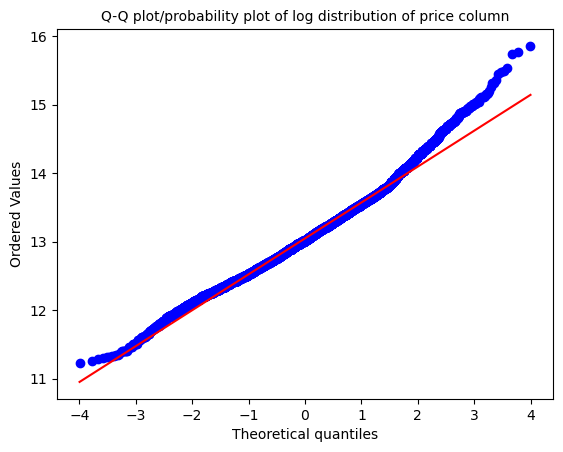

In [23]:
## Checking QQ Plot
stats.probplot(np.log1p(df["price"]), plot=plt)
plt.title("Q-Q plot/probability plot of log distribution of price column", fontsize=10)
plt.show()

Q-Q plot indicates that the price column's log transformation does not fully follow normality. The tail is curved and not straight at either end.

### Univariate, Bivariate, and Multivariate Analysis  for all Features

In [24]:
def dist_plot_agg(data, columns, size=(15,5), num_row=1, num_col=1):
    figure = plt.figure(figsize=size)
    for idx, col in enumerate(columns):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.distplot(data[col])
    return plt.show()

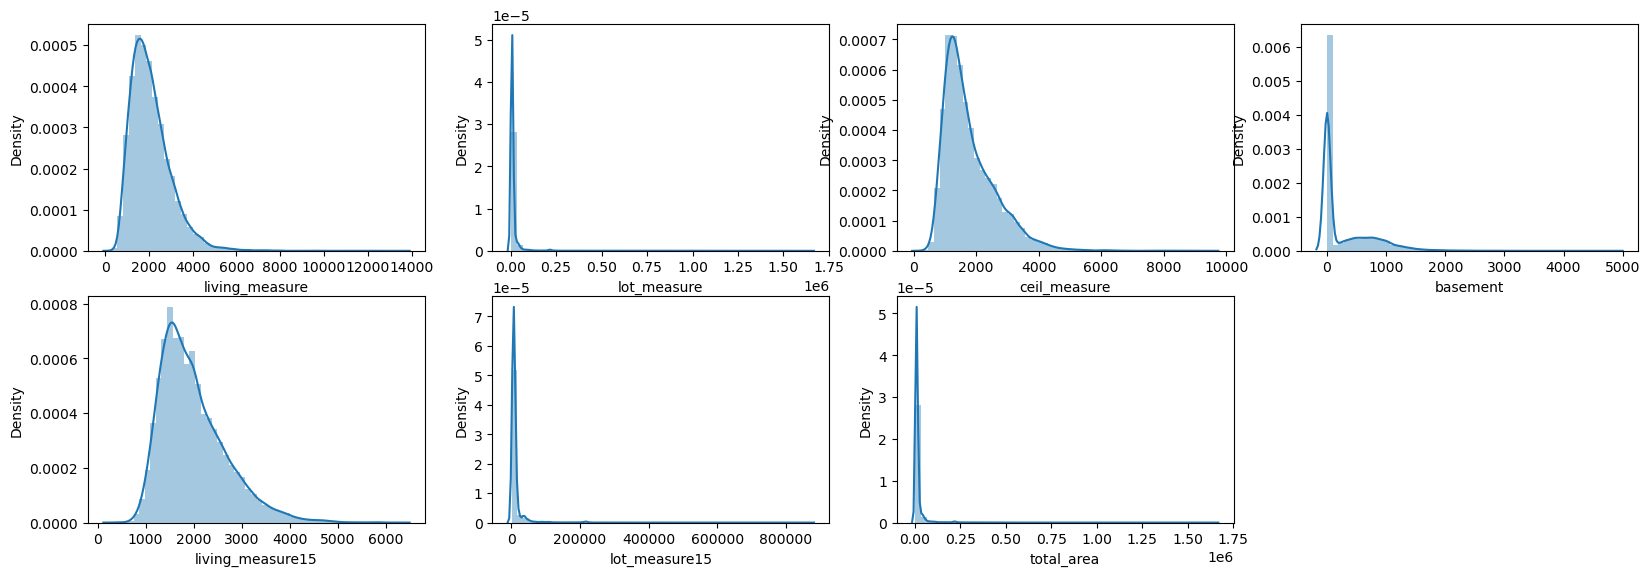

In [25]:
dist_plot_agg(df, continuous_columns, size=(20,10), num_row=3, num_col=4)

In [26]:
## Checking the skewness and kurtosis
for col in continuous_columns:
    print(f"skewness : {df[col].skew():.4f}, kurtosis : {df[col].kurt():.4f}, column : {col}")

skewness : 1.4731, kurtosis : 5.2533, column : living_measure
skewness : 13.0851, kurtosis : 286.0543, column : lot_measure
skewness : 1.4468, kurtosis : 3.4027, column : ceil_measure
skewness : 1.5779, kurtosis : 2.7156, column : basement
skewness : 1.1123, kurtosis : 1.6346, column : living_measure15
skewness : 9.5255, kurtosis : 151.4301, column : lot_measure15
skewness : 12.9749, kurtosis : 281.8961, column : total_area


All the continuous features are right-skewed. lot_measure, lot_measure15 and total_area has big skewness

#### Furnished

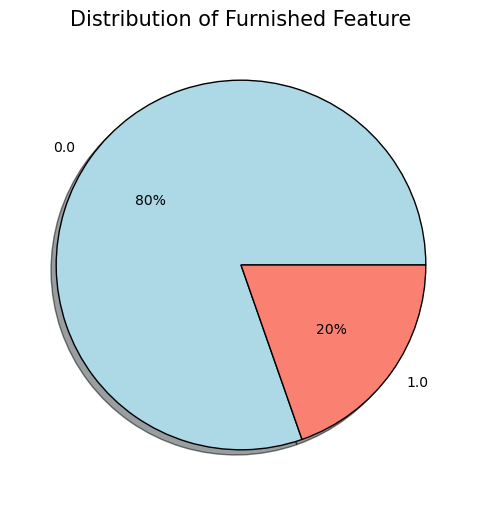

In [27]:
furnished_counts = df["furnished"].value_counts()
values = furnished_counts.values
labels = furnished_counts.index
plt.figure(figsize=(6, 6))
plt.pie(values, 
        labels=labels, 
        autopct='%1.0f%%',
        colors=['lightblue', 'salmon'],
        shadow=True)
for wedge in plt.gca().patches:
    wedge.set_edgecolor('black')

plt.title("Distribution of Furnished Feature", fontsize=15)
plt.show()

Most of the data in the Funrished column is not furnished.

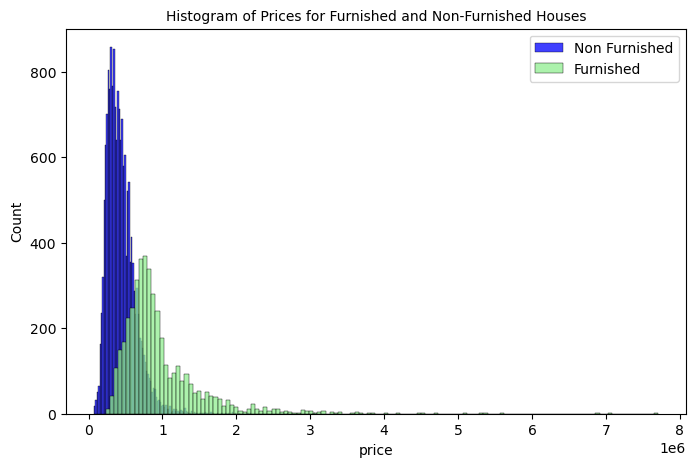

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["furnished"] == 0]["price"], color="blue")
sns.histplot(df[df["furnished"] == 1]["price"], color="lightgreen")
plt.legend(["Non Furnished", "Furnished"])
plt.title("Histogram of Prices for Furnished and Non-Furnished Houses", fontsize=10)
plt.show()

As furnished houses are more expensive than unfurnished ones, there is a definite segregation

#### Coast

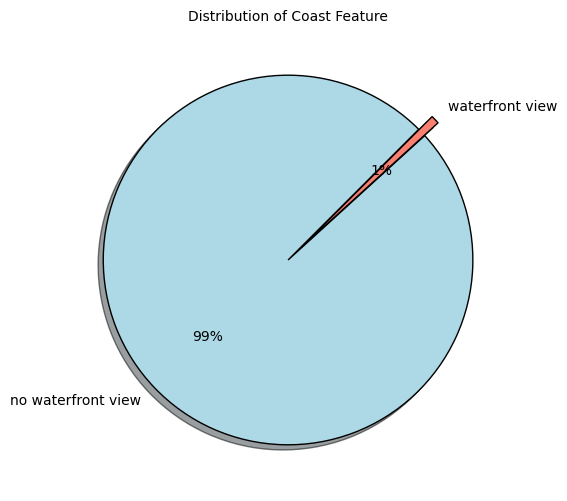

In [31]:
coast_counts = df["coast"].value_counts()
values = coast_counts.values
labels = ["no waterfront view", "waterfront view"]
plt.figure(figsize=(6, 6))
plt.pie(values, 
        labels=labels, 
        autopct='%1.0f%%',
        colors=['lightblue', 'salmon'],
        shadow=True,
        explode=(0, 0.1),  # Pull out the second slice slightly
        startangle=45)
for wedge in plt.gca().patches:
    wedge.set_edgecolor('black')

plt.title("Distribution of Coast Feature", fontsize=10)
plt.show()

Only 1% of the data has waterfront view.

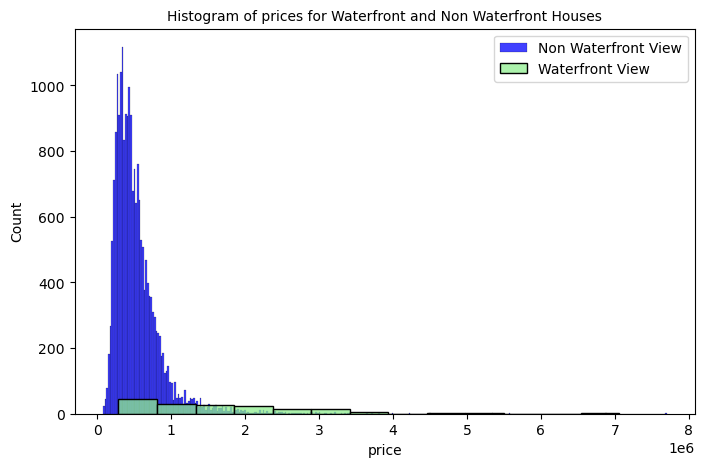

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["coast"] == 0]["price"], color="blue")
sns.histplot(df[df["coast"] == 1]["price"], color="lightgreen")
plt.legend(["Non Waterfront View", "Waterfront View"])
plt.title("Histogram of prices for Waterfront and Non Waterfront Houses", fontsize=10)
plt.show()

House with waterfront view has higer price.

#### Basement

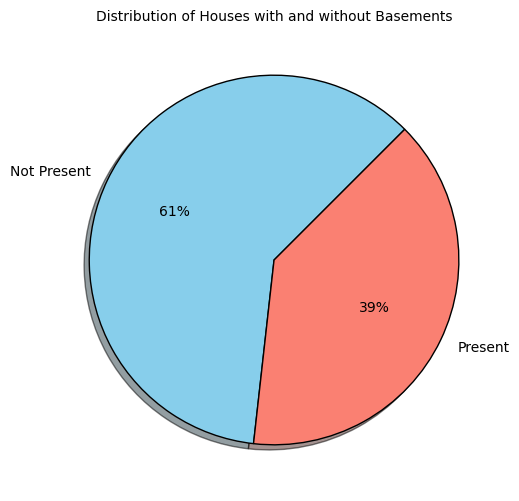

In [33]:
df['has_basement'] = df['basement'].apply(lambda x: 'Present' if x > 0 else 'Not Present')
basement_counts = df['has_basement'].value_counts()
values = basement_counts.values
labels = basement_counts.index
plt.figure(figsize=(6, 6))
plt.pie(values, 
        labels=labels, 
        autopct='%1.0f%%',
        colors=['skyblue', 'salmon'],
        shadow=True,
        startangle=45)
for wedge in plt.gca().patches:
    wedge.set_edgecolor('black')

plt.title("Distribution of Houses with and without Basements", fontsize=10)
plt.show()

65% of the Houses has NO basement.

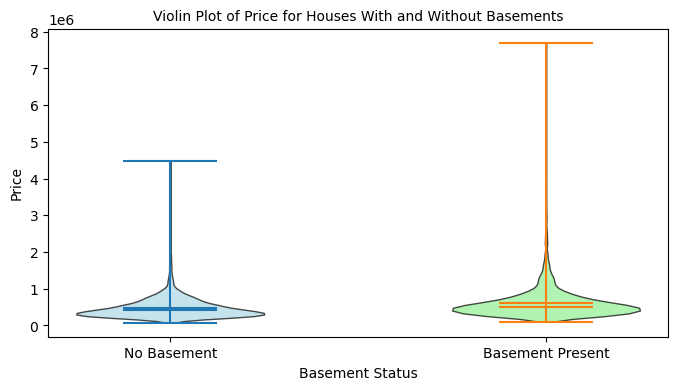

In [34]:
df['has_basement'] = df['basement'].apply(lambda x: 'Present' if x > 0 else 'Not Present')
plt.figure(figsize=(8, 4))
for i, basement_status in enumerate(['Not Present', 'Present']):
    prices = df[df['has_basement'] == basement_status]['price']
    parts = plt.violinplot(prices, positions=[i], showmeans=True, showextrema=True, showmedians=True)
    
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue' if basement_status == 'Not Present' else 'lightgreen')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)

plt.title("Violin Plot of Price for Houses With and Without Basements", fontsize=10)
plt.xlabel("Basement Status")
plt.ylabel("Price")
plt.xticks([0, 1], ['No Basement', 'Basement Present'])

plt.show()

The tail of the violin plot is high for a basement-containing house. Nevertheless, the two houses—one with a basement and the other without—cost roughly the same.

#### Ceil and Ceil Measure

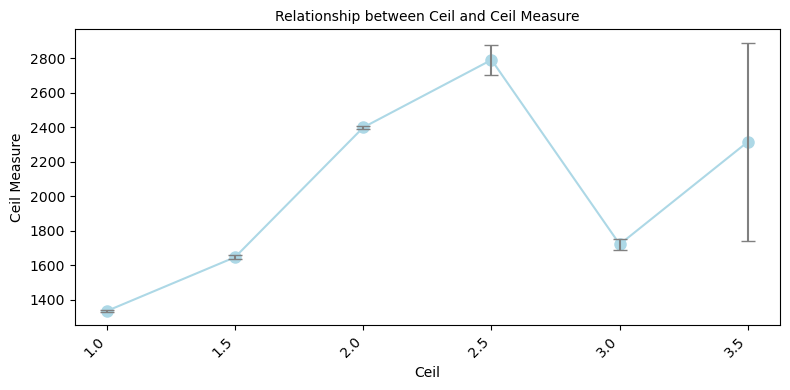

In [35]:
grouped_data = df.groupby('ceil')['ceil_measure'].mean().reset_index()
grouped_data = grouped_data.sort_values('ceil')
plt.figure(figsize=(8, 4))
plt.plot(grouped_data['ceil'], grouped_data['ceil_measure'], 'o-', color='lightblue', markersize=8)
yerr = df.groupby('ceil')['ceil_measure'].sem()
plt.errorbar(grouped_data['ceil'], grouped_data['ceil_measure'], yerr=yerr, fmt='none', color='gray', capsize=5)
plt.title("Relationship between Ceil and Ceil Measure", fontsize=10)
plt.xlabel("Ceil")
plt.ylabel("Ceil Measure")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There is **no correlation** between a house's measurement and the total number of floors it contains.

#### Year of Houses Built

In [36]:
oldest_year = int(df["yr_built"].min())
newest_year = int(df["yr_built"].max())
print("Oldest and Newest year present in the dataset is:")
print("Oldest year:", oldest_year)
print("Newest year:", newest_year)

Oldest and Newest year present in the dataset is:
Oldest year: 1900
Newest year: 2015


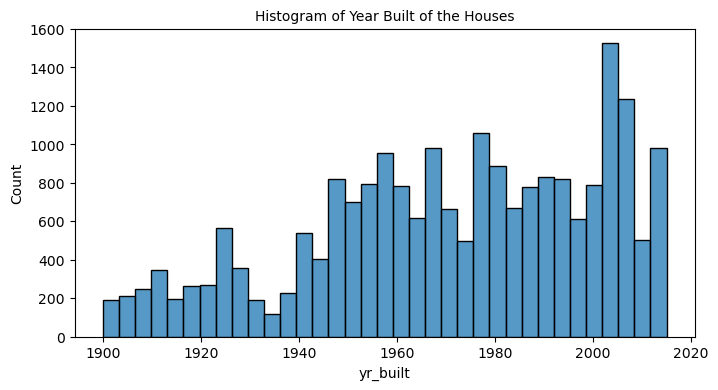

In [37]:
plt.figure(figsize=(8,4))
sns.histplot(df['yr_built'])
plt.title("Histogram of Year Built of the Houses", fontsize=10)
plt.show()

The number of house data in the dataset is also growing with the most recent year.

In [ ]:
## Checking the prices for the houses that are built befor to that of the new ones
house_build_type = df['yr_built'].apply(lambda x : "new" if x > 1999 else "old")
sns.boxplot(x=house_build_type, y="price", data=df)
plt.title("violin plot of price with house which is build after 2000, and before it", fontsize=10)
plt.show()

The price difference between houses built before and after 2000 is minimal.

#### House Renovation

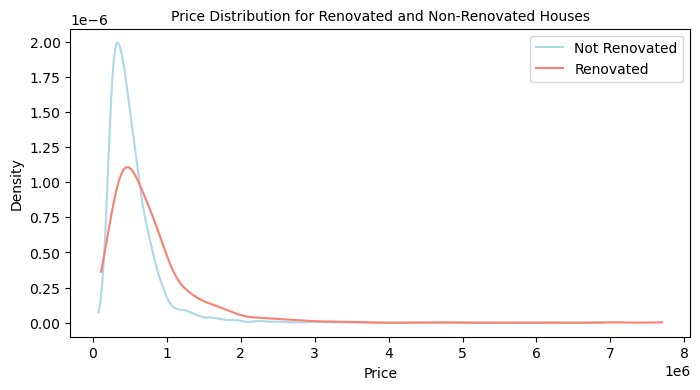

In [39]:
df_temp = df.copy()
df_temp["renovated"] = df_temp['yr_renovated'].apply(lambda x: "Renovated" if x > 0 else "Not Renovated")
plt.figure(figsize=(8, 4))
for status in ["Not Renovated", "Renovated"]:
    prices = df_temp[df_temp["renovated"] == status]["price"]    
    kde = stats.gaussian_kde(prices)
    x_range = range(int(prices.min()), int(prices.max()), 1000)
    plt.plot(x_range, kde(x_range), 
             label=status, 
             color='lightblue' if status == "Not Renovated" else 'salmon')

plt.title("Price Distribution for Renovated and Non-Renovated Houses", fontsize=10)
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

There is **No Impact** in price to the house renovation

#### Categorical Data Box Plot with Price Column

In [40]:
def bivariate_with_output_analysis(data, columns, output_col, num_row=1, num_col=1, size=(15,5)):
    figure = plt.figure(figsize=size)
    for idx, col in enumerate(columns):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.boxplot(x=col, y=output_col, data=data)
        plt.title(col, fontsize=15)
        plt.xlabel("")
    return plt.show()

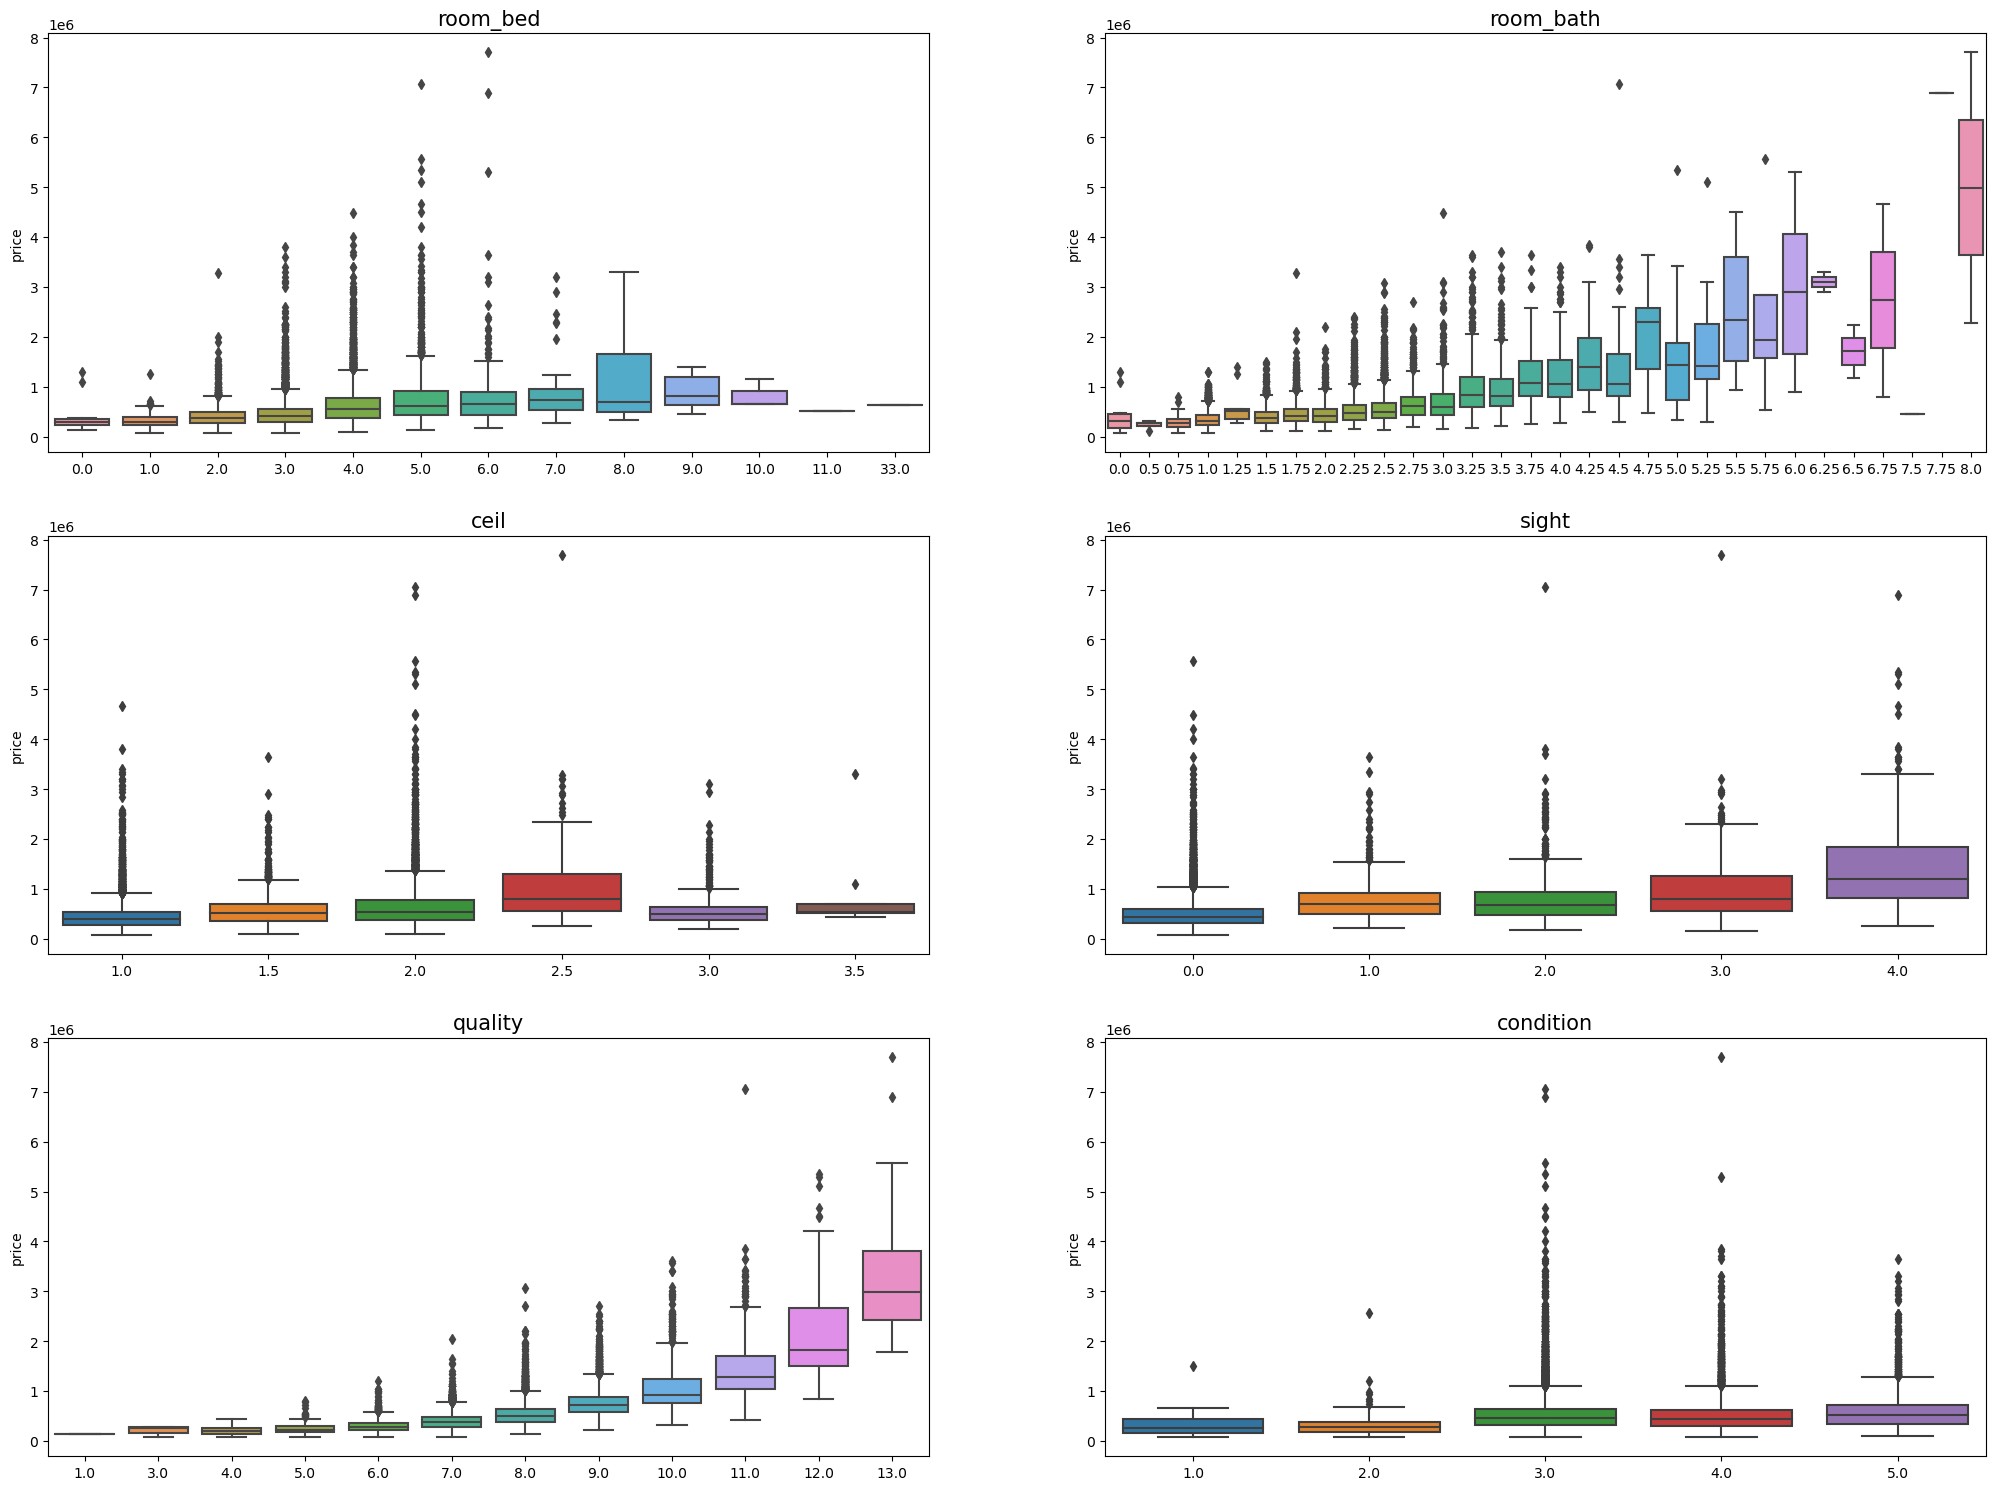

In [41]:
bivariate_with_output_analysis(df, ["room_bed", "room_bath", "ceil", "sight", "quality", "condition"], 
                               "price", num_row=4, num_col=2, size=(25,25))

The price column and the overall quality column are correlated. There is some collinearity between the price data and other columns, like sight. In many situations, the number of bathrooms in a home can also raise its price. However, the price columns are not significantly impacted by the overall condition or the number of floors (ceil).

### Pairplots of coninuous variables with the Price Column

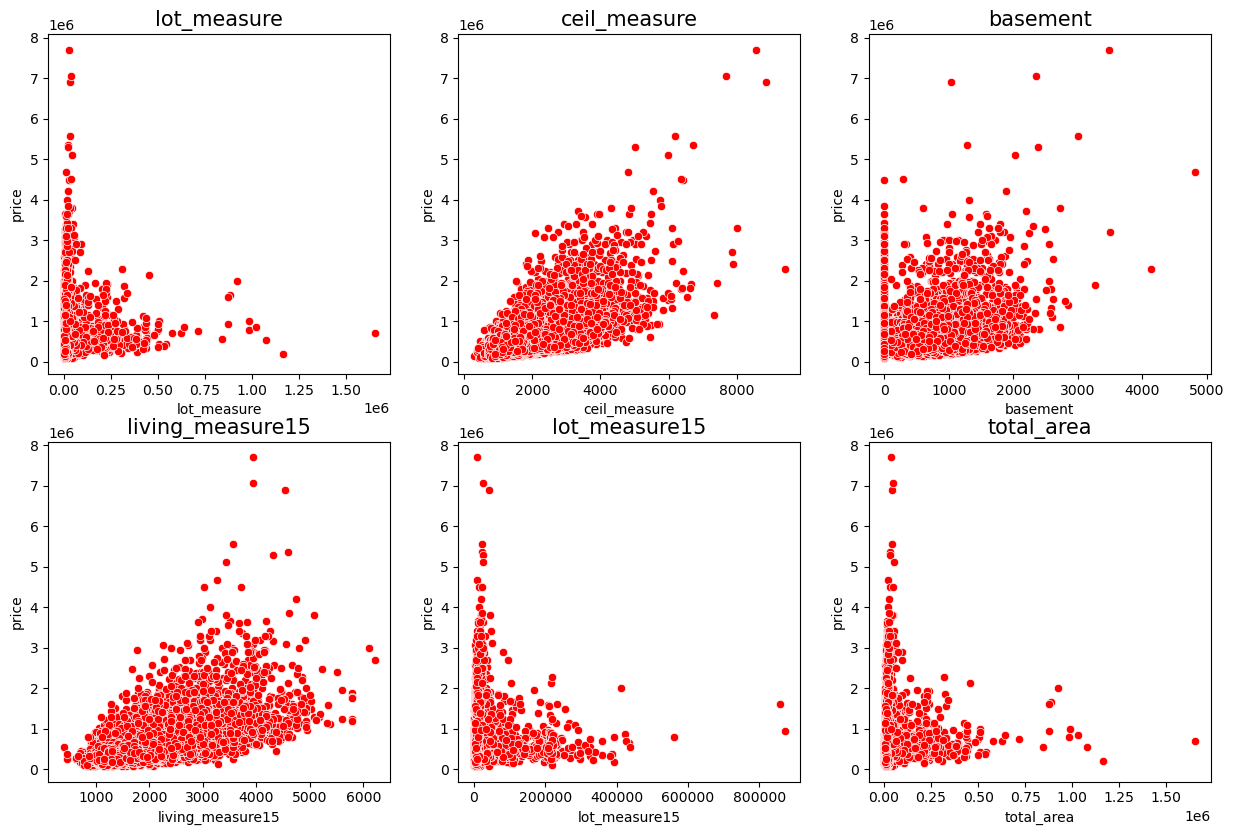

In [42]:
plt.figure(figsize=(15,15))
for idx, col in enumerate(continuous_columns[1:]):
    plt.subplot(3,3, idx+1)
    sns.scatterplot(x=df[col], y=df["price"], color='red')
    plt.title(col, fontsize=15)
plt.show()

**Dayhours**

In [44]:
df_temp = df.copy()

## converting dayhour column into date time format
df_temp["dayhours"] = pd.to_datetime(df_temp["dayhours"])

## getting month and year code
df_temp["month"] = df_temp["dayhours"].dt.month
df_temp["year"] = df_temp["dayhours"].dt.year
df_temp["month_year"] = df_temp["year"].astype("string") + df_temp["month"].astype("string")

In [45]:
df_temp["dayhours"].sort_values()

,dayhours
17176,2014-05-02
16626,2014-05-02
15422,2014-05-02
6337,2014-05-02
13352,2014-05-02
...,...
13258,2015-05-14
11681,2015-05-14
8433,2015-05-15
651,2015-05-24


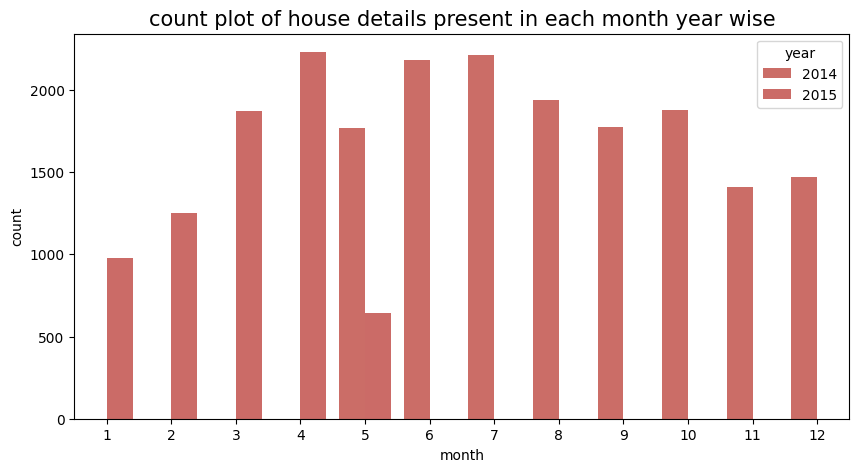

In [46]:
## count plot of data points from month and year
plt.figure(figsize=(10,5))
sns.countplot(x="month", hue="year", data=df_temp, palette = "hls")
plt.title("count plot of house details present in each month year wise", fontsize=15)
plt.show()

**Most of the house data present in the 2015 Apr and 2014 july month.**

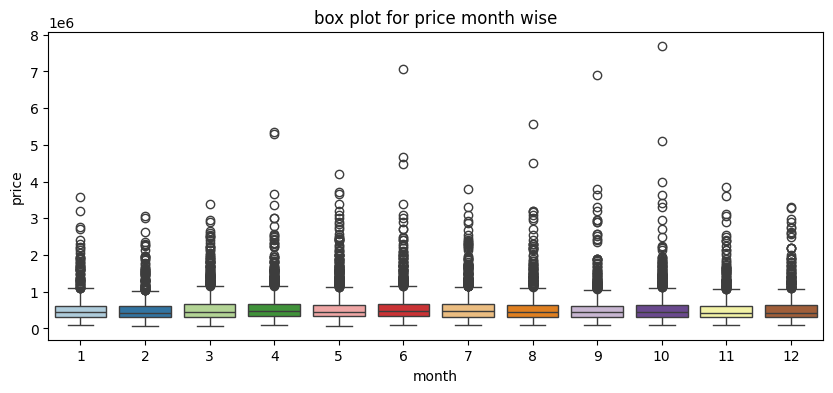

In [47]:
## let's see any trend present in the house price in the following months
plt.figure(figsize=(10,4))
sns.boxplot(data=df_temp, x = "month", y = "price", palette = "Paired")
plt.title("box plot for price month wise")
plt.show()

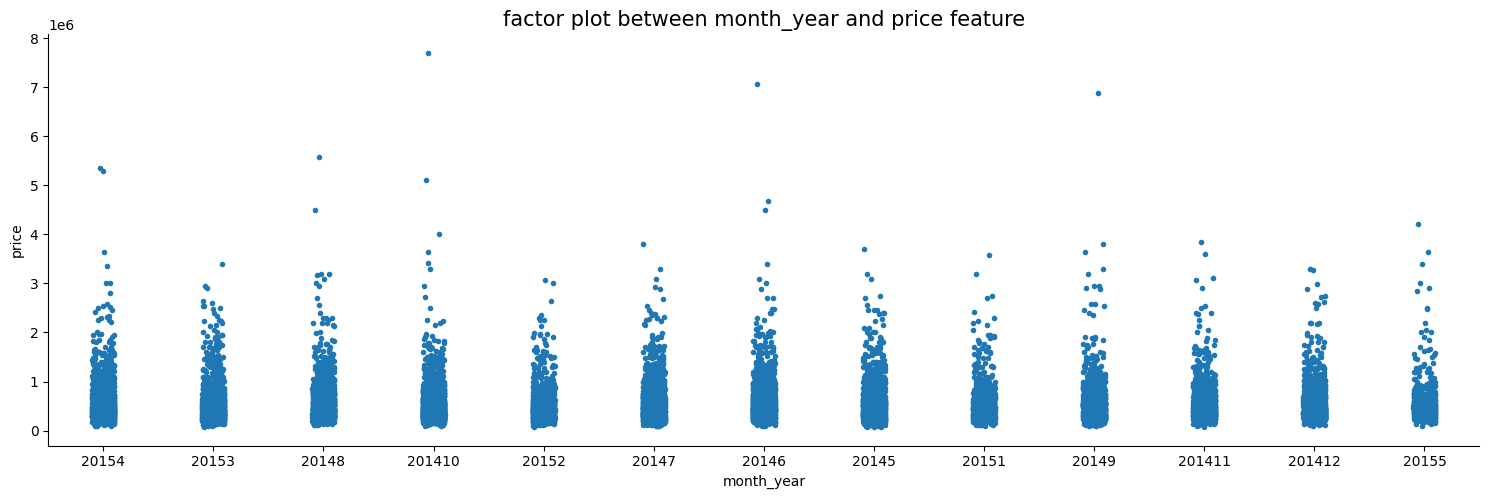

In [48]:
sns.catplot(x="month_year",y='price',data=df_temp, size=4, aspect=3)
plt.title("factor plot between month_year and price feature", fontsize=15)
plt.show()

**There is no trend present in the house price in various months.**

**zipcodes**


*using external file form the below source to get the state and county name from the dataset*

https://simplemaps.com/data/us-zips

In [49]:
zip_df = pd.read_excel("/content/sample_data/uszips.xlsx")
print(zip_df.columns)

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta',
       'parent_zcta', 'population', 'density', 'county_fips', 'county_name',
       'county_weights', 'county_names_all', 'county_fips_all', 'imprecise',
       'military', 'timezone'],
      dtype='object')


In [50]:
zipcodes = df[["zipcode", "price"]].astype("int")
zip_merge = pd.merge(zipcodes, zip_df[["zip", "city", "state_name", "county_name", "density"]],
                     left_on = "zipcode", right_on = "zip", how='left')
zip_merge.head()

,zipcode,price,zip,city,state_name,county_name,density
0,98034,600000,98034,Kirkland,Washington,King,1853.0
1,98118,190000,98118,Seattle,Washington,King,3037.8
2,98118,735000,98118,Seattle,Washington,King,3037.8
3,98002,257000,98002,Auburn,Washington,King,1797.1
4,98118,450000,98118,Seattle,Washington,King,3037.8


In [51]:
print(f'The data belongs only to the US state {zip_merge["state_name"].value_counts().index[0]} and county {zip_merge["county_name"].value_counts().index[0]}.')

The data belongs only to the US state Washington and county King.


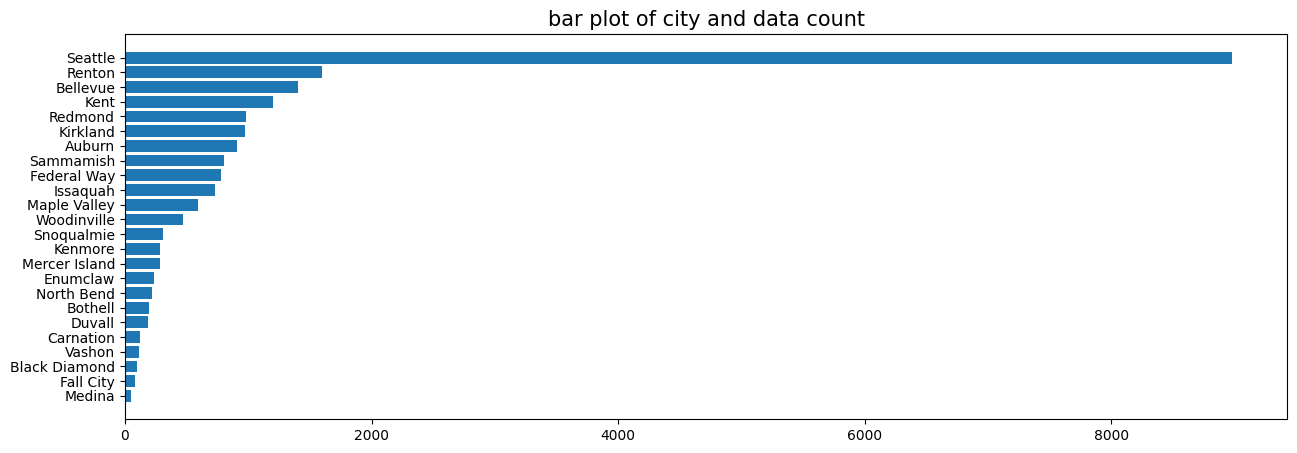

In [52]:
## count plot of house data for different cities
plt.figure(figsize=(15,5))
city_data = collections.OrderedDict(zip_merge["city"].value_counts().to_dict())
plt.barh(list(city_data.keys())[::-1], list(city_data.values())[::-1])
plt.title("bar plot of city and data count", fontsize=15)
plt.show()

Most of the data present in the dataset belongs to Seattle.

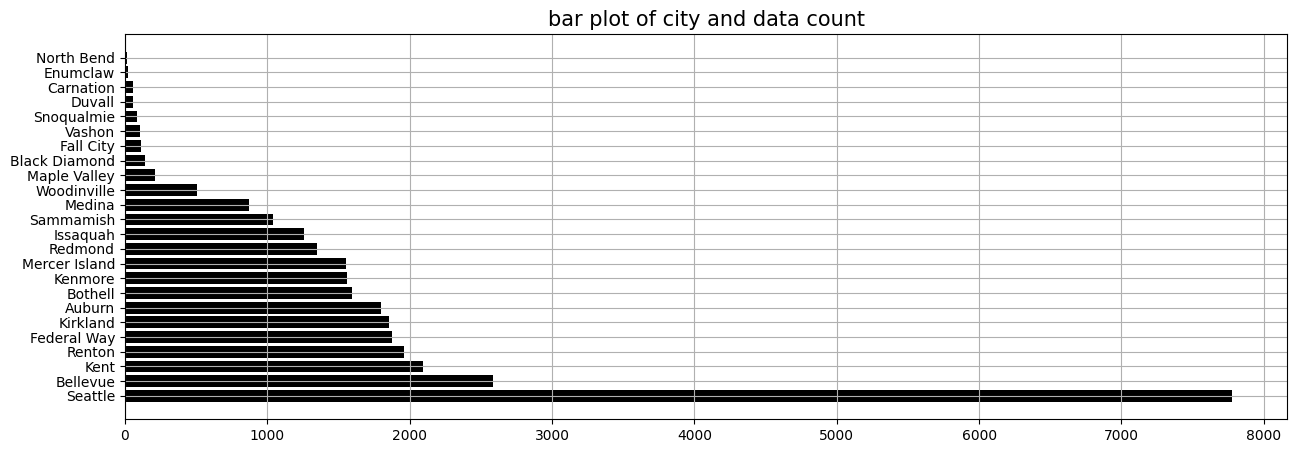

In [53]:
x = zip_merge[["city", "density"]].drop_duplicates()
density_data = x.sort_values(by = "density", ascending=False)

plt.figure(figsize=(15,5))
plt.barh(density_data["city"], density_data["density"], color="black")
plt.grid()
plt.title("bar plot of city and data count", fontsize=15)
plt.show()

The density of the seattle city is very high, also most of the data belongs to the same city itself.

**House Price vs Density of the city**

In [54]:
print(df.columns)
print(zip_df.columns)


Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')
Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta',
       'parent_zcta', 'population', 'density', 'county_fips', 'county_name',
       'county_weights', 'county_names_all', 'county_fips_all', 'imprecise',
       'military', 'timezone'],
      dtype='object')


In [55]:
# Merging the DataFrames
df_temp = pd.merge(df, zip_df, left_on="zipcode", right_on="zip")

# Check column names after the merge
print(df_temp.columns)

# Rename the columns for clarity (assuming you want to use the columns from the original df)
df_temp.rename(columns={"city_x": "city", "density_x": "density"}, inplace=True)

# Sort by 'city' and 'density'
df_temp = df_temp.sort_values(by=["city", "density"])

# Verify the sorting and column names
print(df_temp[['city', 'density']].head())


Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat_x', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'zip', 'lat_y', 'lng', 'city', 'state_id', 'state_name',
       'zcta', 'parent_zcta', 'population', 'density', 'county_fips',
       'county_name', 'county_weights', 'county_names_all', 'county_fips_all',
       'imprecise', 'military', 'timezone'],
      dtype='object')
       city  density
25   Auburn    415.2
82   Auburn    415.2
118  Auburn    415.2
167  Auburn    415.2
168  Auburn    415.2


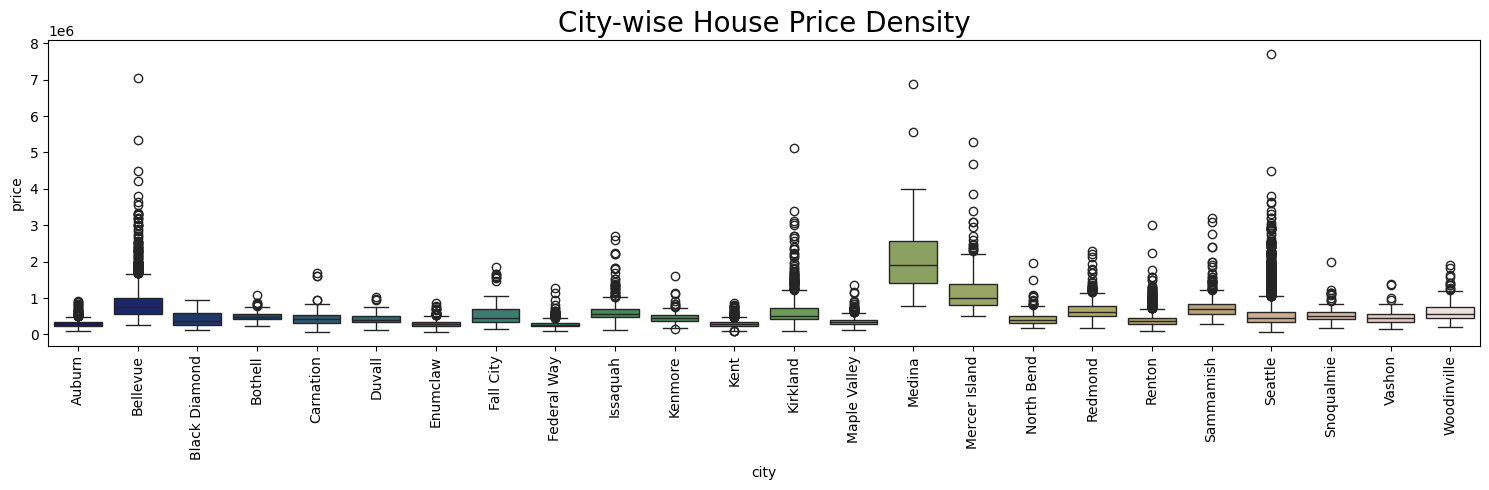

In [56]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_temp, y="price", x="city", palette="gist_earth")
plt.xticks(rotation=90)
plt.title("City-wise House Price Density", fontsize=20)
plt.tight_layout()  # Avoid overlapping labels
plt.show()


Medina city has house with higher values.It may be due to most of posh house will be there. Let's see the house quality in that city.

In [57]:
df_temp[df_temp["city"] == "Medina"]["quality"].value_counts()

,count
quality,
9.0,13
11.0,11
8.0,8
10.0,6
7.0,6
12.0,4
13.0,2


The above count shows that Medina has only quality house present.

## Outlier Analysis

In [58]:
def outlier_detection(data, columns, size=(15,5), num_row = 1, num_col =1):
    """
    This function is to plot box plot for numerical features.
    """
    figure = plt.figure(figsize=size)
    for idx, col in enumerate(columns):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.boxplot(data[col])
        plt.title(col, fontsize=15)
        plt.xlabel("")
    return plt.show()

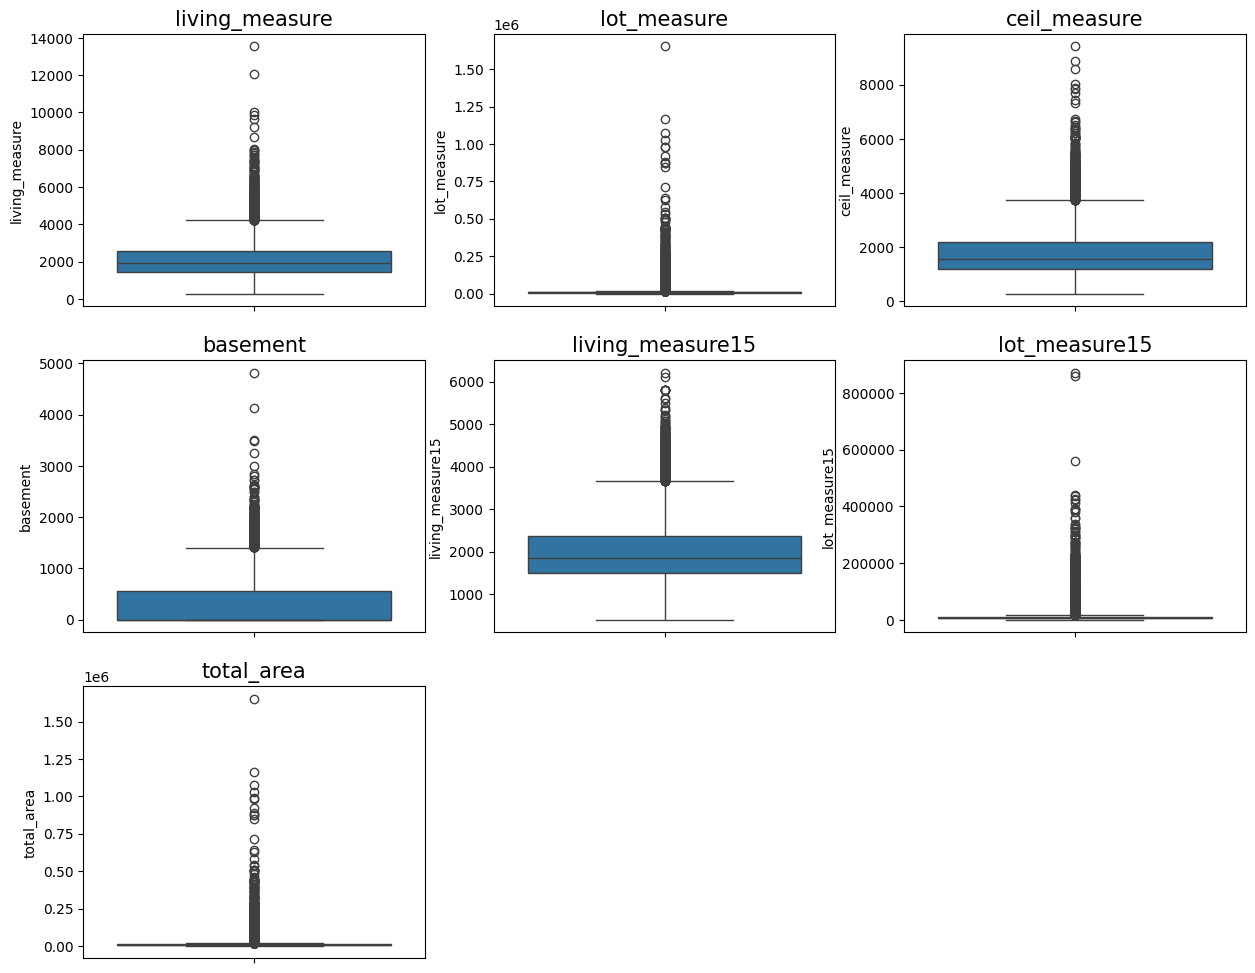

In [59]:
outlier_detection(df, continuous_columns, size=(15,12), num_row = 3, num_col =3)

From initial analysis of box plot we can say that there are outliers present in the dataset for each contnuous columns.

#### Outlier between living measure and price

In [60]:
def outlier_using_DBSCAN(data, input_col, output_col, eps=2, min_samples=3):
    ## Importing required library
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import DBSCAN
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    ## Scaling the data for better performance of DBSCAN
    df_scaled = pd.DataFrame(StandardScaler().fit_transform(data[[input_col, output_col]]), columns=[input_col, output_col])

    ## Fitting DBSCAN model
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)

    ## Creating a temporary DataFrame to store the labels
    df_tmp = pd.concat((df_scaled, pd.DataFrame(model.labels_, columns=['label'])), axis=1)

    ## Plotting the data
    sns.scatterplot(x=data[input_col], y=data[output_col], color="blue", label="Data Points")
    sns.scatterplot(x=data.iloc[df_tmp[df_tmp["label"] == -1].index][input_col],
                    y=data.iloc[df_tmp[df_tmp["label"] == -1].index][output_col],
                    color='green', s=100, alpha=0.6, label="Outliers")
    plt.title("Outlier Detection using DBSCAN Clustering", fontsize=20)
    plt.legend()
    plt.show()

    return df_tmp


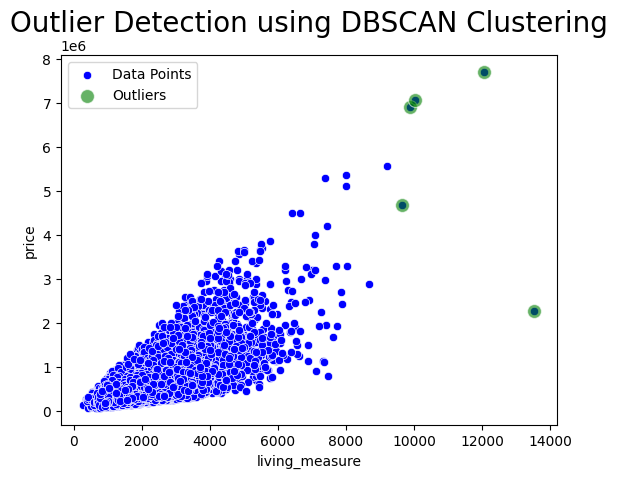

In [61]:
df_tmp = outlier_using_DBSCAN(df, "living_measure", "price", eps=2, min_samples=3)

## getting index to remove data in future
living_measure_outliers_index = df.iloc[df_tmp[df_tmp["label"] != -1].index]

As we can see above using DBSCAN method we have detected 5 outliers

#### Outlier analysis between total area and price

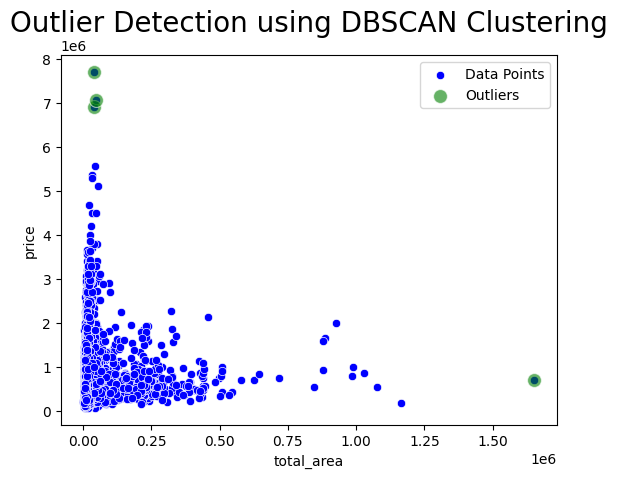

In [62]:
df_tmp1 = outlier_using_DBSCAN(df, "total_area", "price", eps=3, min_samples=5)

## getting index to remove data in future
area_outliers_index = df.iloc[df_tmp1[df_tmp1["label"] != -1].index]

### Correlation plot

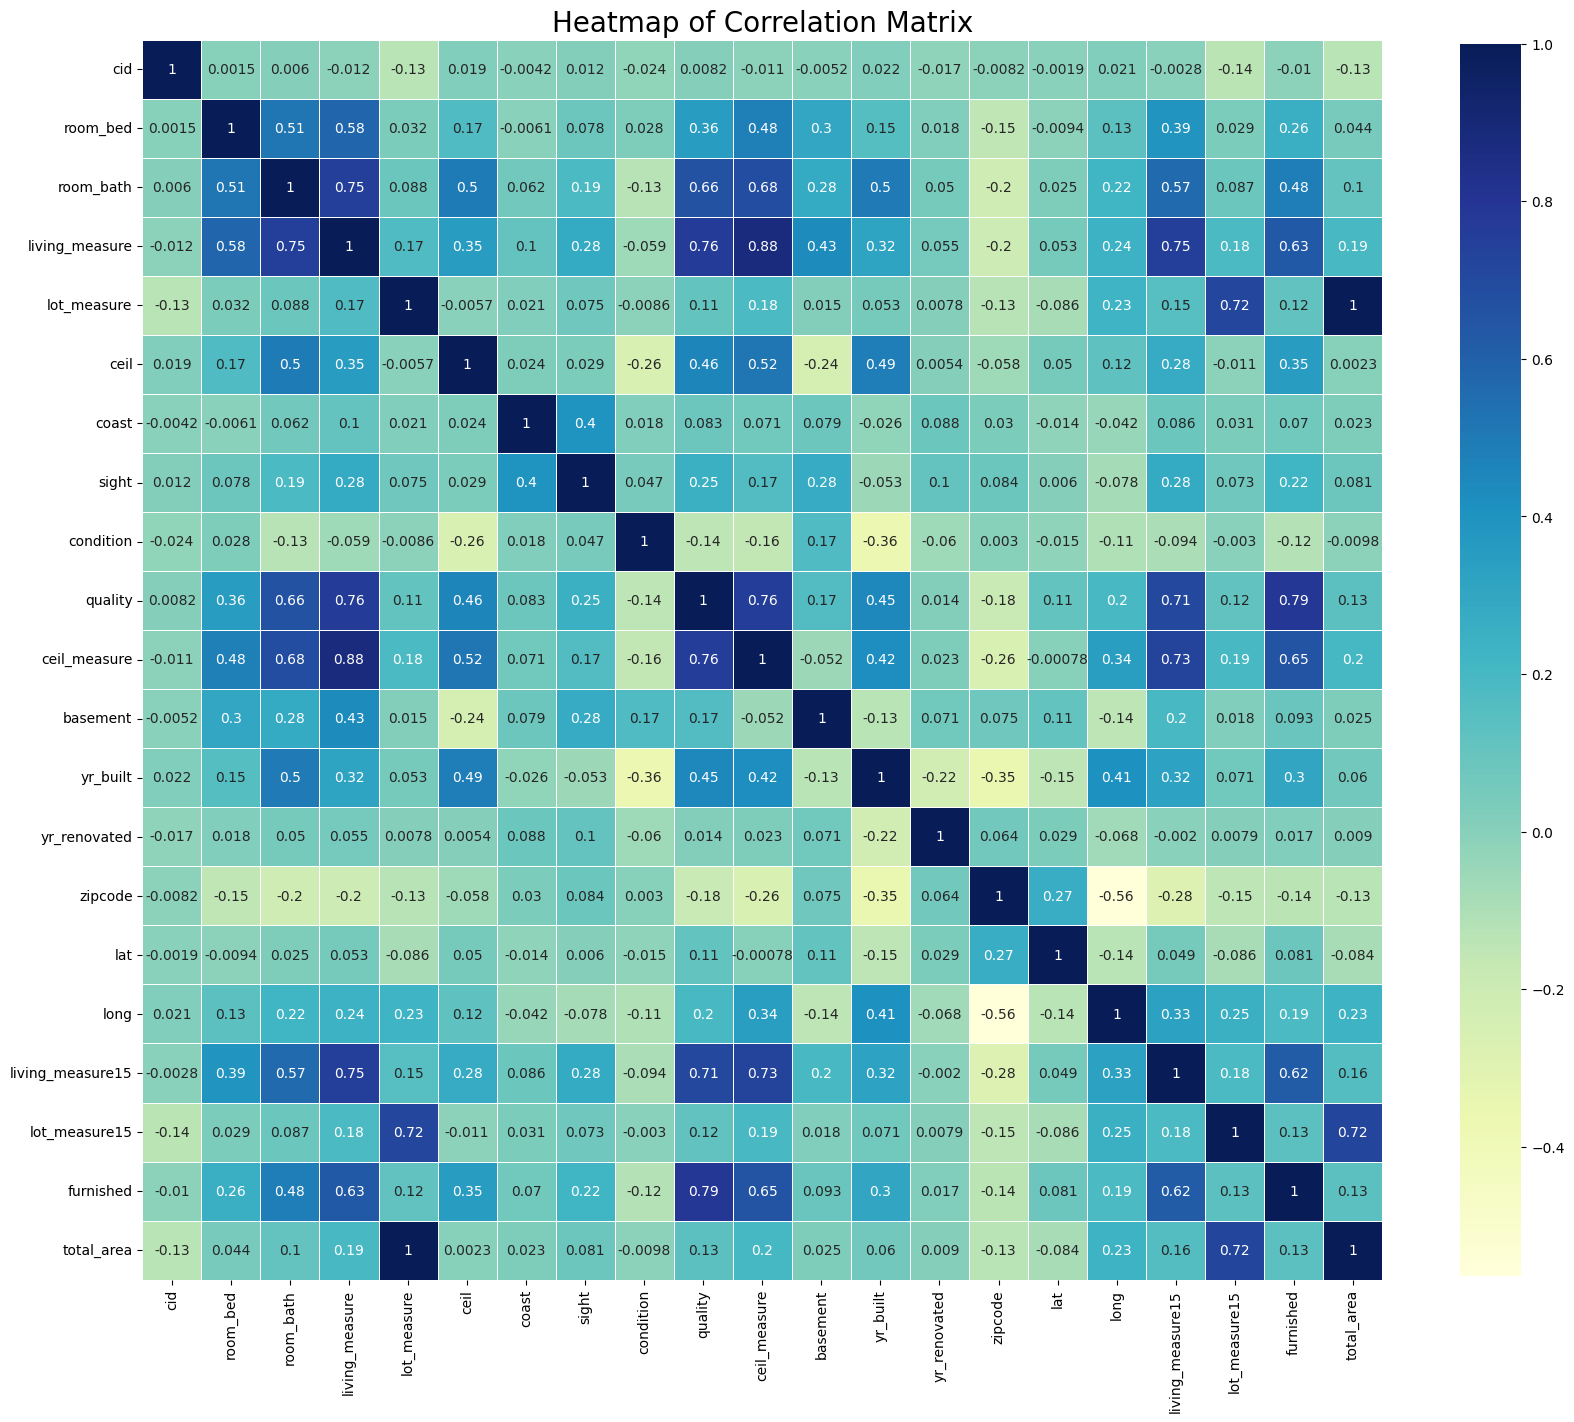

In [63]:
# Filtering only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number']).drop(columns="price")

# Setting up the figure size
fig = plt.figure(figsize=(20, 20))

# Heatmap for correlation analysis
plot = sns.heatmap(numeric_df.corr(), square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                   annot=True, cmap='YlGnBu')

# Adding title for better visualization
plt.title("Heatmap of Correlation Matrix", fontsize=20)
plt.show()


Price is my target column. The above heatmap potential features that could be used for machine learning are: furnished, ceil_measure, living_measure15, quality, and living_measure.

In [64]:
def get_redundant_pairs(df):
    """Get redundant pairs of correlations, such as self-correlations and mirrored pairs"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    """Get top absolute correlations"""
    # Filter only numeric columns to avoid issues with strings or datetime
    numeric_df = df.select_dtypes(include=[float, int])
    au_corr = numeric_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(numeric_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [65]:
corr_data = get_top_abs_correlations(df.drop(columns = "price"), n=15)
corr_data

,,0
lot_measure,total_area,0.998242
living_measure,ceil_measure,0.876365
quality,furnished,0.788124
living_measure,quality,0.762523
quality,ceil_measure,0.755917
living_measure,living_measure15,0.753589
room_bath,living_measure,0.752603
ceil_measure,living_measure15,0.729345
lot_measure15,total_area,0.719257
lot_measure,lot_measure15,0.716148


From the above redundent pair of input features we can see that

- lot_measure , lot_measure15 and total_area has correlation.
- most of the features such as furnished, ceil_measure, quality also correlated with each other and can make the input data redundent.

In [66]:
## getting all the features in high correlation
features = [val[0] for val in corr_data.index]
features.extend([val[1] for val in corr_data.index])
Counter(features).most_common()

[('living_measure', 5),
 ('quality', 5),
 ('ceil_measure', 5),
 ('room_bath', 3),
 ('furnished', 3),
 ('living_measure15', 3),
 ('lot_measure', 2),
 ('lot_measure15', 2),
 ('total_area', 2)]

#### Correlation plot with output

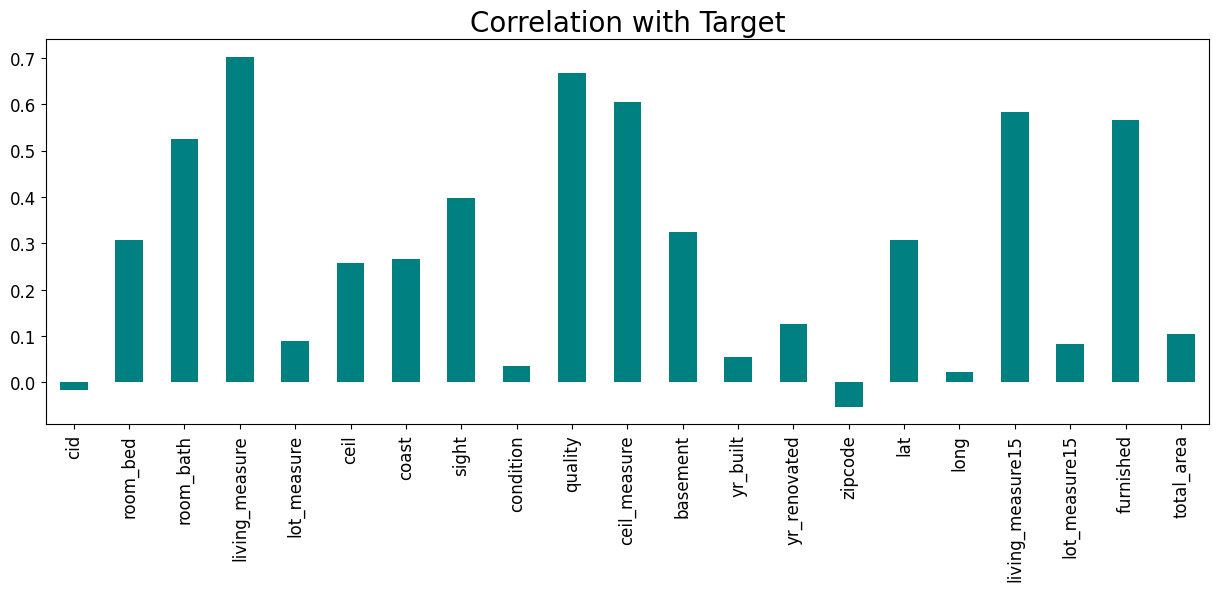

In [67]:
# Filter only numeric columns to avoid issues with strings or datetime
numeric_df = df.select_dtypes(include=[float, int])

# Checking correlation of each numeric feature with the target ('price')
plot = numeric_df.drop(columns="price").corrwith(df["price"]).plot.bar(figsize=(15, 5), fontsize=12, rot=90, color="teal")

plt.title('Correlation with Target', fontsize=20)
plt.show()


living measure has the highest correlation with the output which is more than 0.7

### Feature Engineering

In [68]:
df1 = pd.merge(df[["zipcode", "price"]], zip_df, left_on = "zipcode",
               right_on = "zip") ## merging uszip file with the original data

## selecting density and city columns to the main dataset
df["city"] = df1["city"]
df["density"] = df1["density"]

In [69]:
city_dict = dict()
for i, j in zip(range(len(df["city"].unique())), sorted(df["city"].unique())):
    city_dict[j] = i
df["city"] = df["city"].map(city_dict)

In [70]:
## creating some binary features
df["basement_binary"] = df["basement"].apply(lambda x : 1 if x >0 else 0)
df["renovated"] = df['yr_renovated'].apply(lambda x : 1 if x > 0 else 0)

In [71]:
## converting year build column into bins
data = []
for val in df["yr_built"].values:
    if val <= 1925:
        data.append(0)
    elif ((val > 1925) and (val <= 1950)):
        data.append(1)
    elif ((val > 1950) and (val <= 1975)):
        data.append(2)
    elif ((val > 1975) and (val <= 2000)):
        data.append(3)
    elif (val > 2000):
        data.append(4)

df["yr_build_group"] = data

In [72]:
## adding total floors, bathroom, and bed in a hourse
df["total_room"] = df["room_bed"] + df["room_bath"] + df["ceil"]

### Feature Selection

In [73]:
## remove correlated features which may affect the model as it is not adding any information
## selecting total_area to remove as it is almost 100% correalted with living_measure and living_measure has a higher corr as comapred to total_area
## removing living_measure15 as it is highly correlated with 4 other features and has a low correlation with the output data
corr_col =  ["total_area", "living_measure15"]

## removing datehour column also as the month and year not adding any importance to the model
datetime_cl = ["dayhours"]

## removing yr_renovated and basement as binary column already created
used_col = ["basement", "yr_renovated", "yr_built"]

## removing zip code as already used to get city and density
area_col = ["zipcode"]

## adhoc columns
adhoc_col = ["cid"]

## getting all columns which need to be dropped
drop_list = adhoc_col + area_col + used_col + datetime_cl + corr_col

## dropping outliers detected from living_measure and price plot
df = df.iloc[living_measure_outliers_index.index,:]

## dropped columns
df_selected = df.copy()
df_selected = df_selected.drop(columns = drop_list)

In [74]:
## new shape of the dataset
print(f"shape : {df_selected.shape}")

shape : (21608, 21)


### Data Preprocessing

In [75]:
## converting data into categorical columns
final_cat_cols = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'furnished',
                  'condition', 'quality', 'city', 'basement_binary', 'renovated',
                  'total_room', 'yr_build_group']
for col in final_cat_cols:
    print(f"converting column : {col}")
    df_selected[col] = df_selected[col].astype("category")

## seggregating into one hot encoded, ordinal encoded columns
one_hot = ['coast', 'furnished', 'basement_binary', 'renovated', 'city']
ordinal = ['room_bed', 'room_bath', 'ceil', 'sight', 'condition', 'quality',
           'total_room']

## numerical columns
final_num_cols = ['living_measure', 'lot_measure', 'ceil_measure', 'lat', 'long',
                  'lot_measure15', 'density']

converting column : room_bed
converting column : room_bath
converting column : ceil
converting column : coast
converting column : sight
converting column : furnished
converting column : condition
converting column : quality
converting column : city
converting column : basement_binary
converting column : renovated
converting column : total_room
converting column : yr_build_group


In [107]:
df_selected.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'lat',
       'long', 'lot_measure15', 'furnished', 'city', 'density',
       'basement_binary', 'renovated', 'yr_build_group', 'total_room'],
      dtype='object')

### Splitting data

In [76]:
y = df_selected["price"]
X = df_selected.drop(columns = "price")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17286, 20), (4322, 20), (17286,), (4322,))

In [77]:
## reshaping output
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17286, 20), (4322, 20), (17286, 1), (4322, 1))

### Data Encoding

In [78]:
## copy datasets
xtrain = x_train.copy()
xtest = x_test.copy()

## one hot encoding
for idx, col in enumerate(one_hot):
    enc = OneHotEncoder()
    data_tr = enc.fit_transform(xtrain[[col]]).toarray()
    data_te = enc.transform(xtest[[col]]).toarray()
    for idx, val in enumerate(sorted(xtrain[col].unique())):
        xtrain[col + "_" + str(val).lower()] = data_tr[:,idx]
        xtest[col + "_" + str(val).lower()] = data_te[:,idx]
    xtrain = xtrain.drop(columns = col)
    xtest = xtest.drop(columns = col)

In [79]:
## encoding output columns
enc_output = StandardScaler()
ytrain = enc_output.fit_transform(y_train.reshape(-1,1))
ytest = enc_output.transform(y_test.reshape(-1,1))

In [80]:
## copy datasets
xtrain1 = xtrain.copy()
xtest1 = xtest.copy()

## standard scaling all the features
for col in xtrain1.columns:
    enc = StandardScaler()
    xtrain1[col] = enc.fit_transform(xtrain1[[col]])
    xtest1[col] = enc.transform(xtest1[[col]])

### Selecting K-Best method

In [81]:
## selected features
print(f"The total number of features generated at the end is {xtrain.shape[1]}.")
print("Let's select top 15 features for model building using SelectKBest Method.")

The total number of features generated at the end is 47.
Let's select top 15 features for model building using SelectKBest Method.


In [82]:
##using select K-best method to select features which is based on univariate statistical test
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(mutual_info_regression, k = 15)
selector.fit(xtrain1, ytrain)

selected_features = xtrain.columns[selector.get_support()]
print("Selected features are : ")
print(selected_features)

Selected features are : 
Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'sight', 'quality', 'ceil_measure', 'lat', 'long', 'lot_measure15',
       'density', 'total_room', 'furnished_0.0', 'furnished_1.0'],
      dtype='object')


In [83]:
## selecting features generated from SelectKBest
xtrain_selected = xtrain[selected_features]
xtest_selected = xtest[selected_features]

In [84]:
## creating pipeline
col_transform = ColumnTransformer([("num_transform", StandardScaler(), selected_features)])

### Model Building using features selected from Select K-Best Method

#### K-Neighbors Regressor

In [85]:
## creating model pipeline
model_combined = make_pipeline(col_transform, KNeighborsRegressor()) ## combining model

model_optimal = GridSearchCV(model_combined, {'kneighborsregressor__n_neighbors': [i for i in range(1,22)]},
                             verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal K for the dataset is {model_optimal.best_params_['kneighborsregressor__n_neighbors']}.")

best_model = model_optimal.best_estimator_ ## getting best model

Fitting 3 folds for each of 21 candidates, totalling 63 fits
The optimal K for the dataset is 6.


In [86]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model.predict(xtrain_selected))
ypred_te = enc_output.inverse_transform(best_model.predict(xtest_selected))

## creating output metrics
knn_metrics = pd.DataFrame({"Model" : "KNeighbourRegressor",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})
knn_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,KNeighbourRegressor,75068.971972,90639.048511,1.918293e+10,2.869867e+10,0.135628,0.167286,0.851912,0.76295


#### Ridge Regression

In [87]:
## creating model pipeline
from sklearn.linear_model import Ridge

model_combined = make_pipeline(col_transform, Ridge()) ## combining model

model_optimal = GridSearchCV(model_combined, {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
                             verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal alpha for the dataset is {model_optimal.best_params_['ridge__alpha']}.")

best_model_ridge = model_optimal.best_estimator_ ## getting best model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The optimal alpha for the dataset is 10.


In [88]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_ridge.predict(xtrain_selected))
ypred_te = enc_output.inverse_transform(best_model_ridge.predict(xtest_selected))

## creating output metrics
ridge_metrics = pd.DataFrame({"Model" : "RidgeRegression",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})
ridge_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,RidgeRegression,128005.887957,127273.108875,4.240188e+10,3.857949e+10,0.253434,0.253159,0.672667,0.681335


#### Lasso Regression

In [89]:
## creating model pipeline
from sklearn.linear_model import Lasso

model_combined = make_pipeline(col_transform, Lasso()) ## combining model

model_optimal = GridSearchCV(model_combined, {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
                             verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal alpha for the dataset is {model_optimal.best_params_['lasso__alpha']}.")

best_model_lasso = model_optimal.best_estimator_ ## getting best model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The optimal alpha for the dataset is 0.001.


In [90]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_lasso.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_lasso.predict(xtest_selected).reshape(-1,1))

## creating output metrics
lasso_metrics = pd.DataFrame({"Model" : "LassoRegression",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})

lasso_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,LassoRegression,127887.082351,127149.360639,4.240514e+10,3.857350e+10,0.253115,0.252848,0.672641,0.681384


#### Decision Tree Regressor

In [91]:
## creating model pipeline
from sklearn.tree import DecisionTreeRegressor

model_combined = make_pipeline(col_transform, DecisionTreeRegressor(random_state=42)) ## combining model

param_grid = {'decisiontreeregressor__max_depth': [15, 20, 25, 30],
              'decisiontreeregressor__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
              'decisiontreeregressor__max_features' : ["auto", "sqrt", "log2"]}

model_optimal = GridSearchCV(model_combined, param_grid, verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"best estimator is : {model_optimal.best_estimator_}")

best_model_dt = model_optimal.best_estimator_ ## best estimator

Fitting 3 folds for each of 120 candidates, totalling 360 fits
best estimator is : Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transform',
                                                  StandardScaler(),
                                                  Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'sight', 'quality', 'ceil_measure', 'lat', 'long', 'lot_measure15',
       'density', 'total_room', 'furnished_0.0', 'furnished_1.0'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=15, max_features='sqrt',
                                       min_samples_leaf=7, random_state=42))])


In [92]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_dt.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_dt.predict(xtest_selected).reshape(-1,1))

## creating output metrics
dt_metrics = pd.DataFrame({"Model" : "DecisionTreeRegression",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})

dt_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,DecisionTreeRegression,79613.397678,103811.648197,2.058334e+10,3.675443e+10,0.147877,0.189859,0.841101,0.69641


#### Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Creating model pipeline
model_combined = make_pipeline(
    col_transform,
    RandomForestRegressor(random_state=42, max_depth=15, max_features='sqrt', min_samples_leaf=7)  # Using 'sqrt' instead of 'auto'
)

# Defining parameter grid for GridSearchCV
param_grid = {'randomforestregressor__n_estimators': range(100, 120, 1)}

# Setting up GridSearchCV
model_optimal = GridSearchCV(model_combined, param_grid, verbose=2, cv=2, n_jobs=-1, scoring="r2")

# Fitting the model to training data
model_optimal.fit(xtrain_selected, ytrain)

# Getting the best model and printing the optimal parameters
print(f"The optimal parameters for the dataset are - n_estimators: {model_optimal.best_params_['randomforestregressor__n_estimators']}.")

best_model_rf = model_optimal.best_estimator_



Fitting 2 folds for each of 20 candidates, totalling 40 fits
The optimal parameters for the dataset are - n_estimators: 115.


In [95]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_rf.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_rf.predict(xtest_selected).reshape(-1,1))

## creating output metrics
rf_metrics = pd.DataFrame({"Model" : "RandomForestRegressor",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})

rf_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,RandomForestRegressor,66038.95231,79305.040248,1.466163e+10,2.060536e+10,0.124874,0.149676,0.886815,0.8298


#### LightGBM

In [ ]:
import lightgbm as lgbm
lgbm.LGBMRegressor() ## creating object

param_grid = {'max_depth' : [10], "colsample_bytree" : [0.5],'boosting_type' : 'gbdt','max_bin' : 256,'objective' : 'regression',
              'min_split_gain' : [0.075],'min_child_samples':[2],'learning_rate' : [0.01],'metric' : ['mape'],'subsample' : [0.7],
              'n_estimators' : 1000,'lambda_l1' : [0.1],'monotone_constraints':[1,1,1,1,1,1,1,1,0,0,1,1,-1,1,-1]}

train = lgbm.Dataset(xtrain_selected, label = y_train.reshape(len(y_train),))
test = lgbm.Dataset(xtest_selected, label = y_test.reshape(len(y_test),))

model_lgbm = lgbm.train(param_grid, train, valid_sets = test, early_stopping_rounds=20, num_boost_round=100)

In [ ]:
## predicting for the test and train dataset
ypred_tr = model_lgbm.predict(xtrain_selected).reshape(-1,1)
ypred_te = model_lgbm.predict(xtest_selected).reshape(-1,1)

## creating output metrics
lgbm_metrics = pd.DataFrame({"Model" : "LightGBMRegressor",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})   
                                                   
lgbm_metrics

### Final Summary for the models created

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
## summarizing model
model_output_with_KBest = pd.concat([knn_metrics, ridge_metrics, lasso_metrics, dt_metrics, rf_metrics])
model_output_with_KBest.round(2)

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,KNeighbourRegressor,75068.97,90639.05,1.918293e+10,2.869867e+10,0.14,0.17,0.85,0.76
0,RidgeRegression,128005.89,127273.11,4.240188e+10,3.857949e+10,0.25,0.25,0.67,0.68
0,LassoRegression,127887.08,127149.36,4.240514e+10,3.857350e+10,0.25,0.25,0.67,0.68
0,DecisionTreeRegression,79613.40,103811.65,2.058334e+10,3.675443e+10,0.15,0.19,0.84,0.70
0,RandomForestRegressor,66038.95,79305.04,1.466163e+10,2.060536e+10,0.12,0.15,0.89,0.83


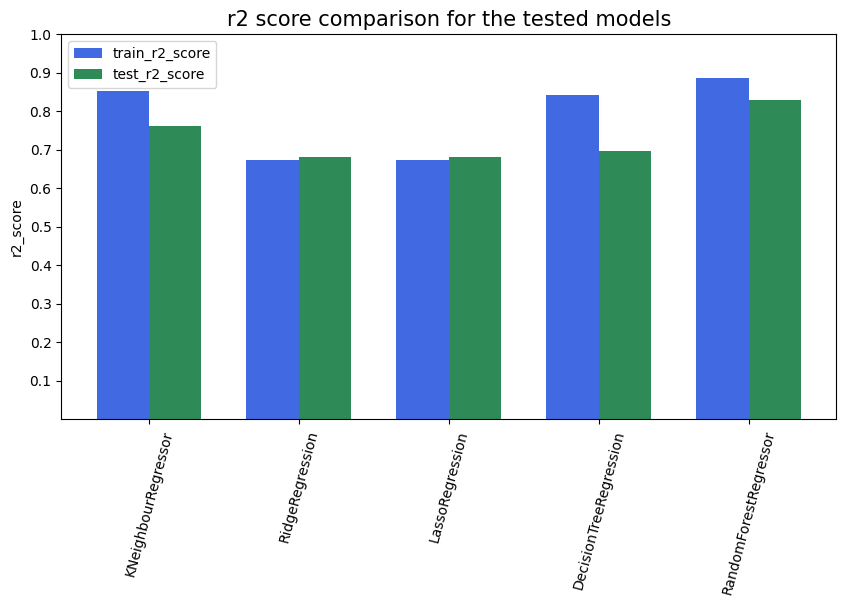

In [100]:
fig = plt.figure(figsize=(10,5))
plot1 = plt.bar(np.arange(5), model_output_with_KBest.train_r2, 0.35, color='royalblue', label="train_r2_score")
plot2 = plt.bar(np.arange(5) + 0.35, model_output_with_KBest.test_r2, 0.35, color='seagreen', label="test_r2_score")
plt.legend(loc='best')
plt.xticks(np.arange(5) + 0.35 / 2, tuple(model_output_with_KBest.Model.values), rotation=75)
plt.title("r2 score comparison for the tested models", fontsize=15)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel("r2_score")
plt.show()


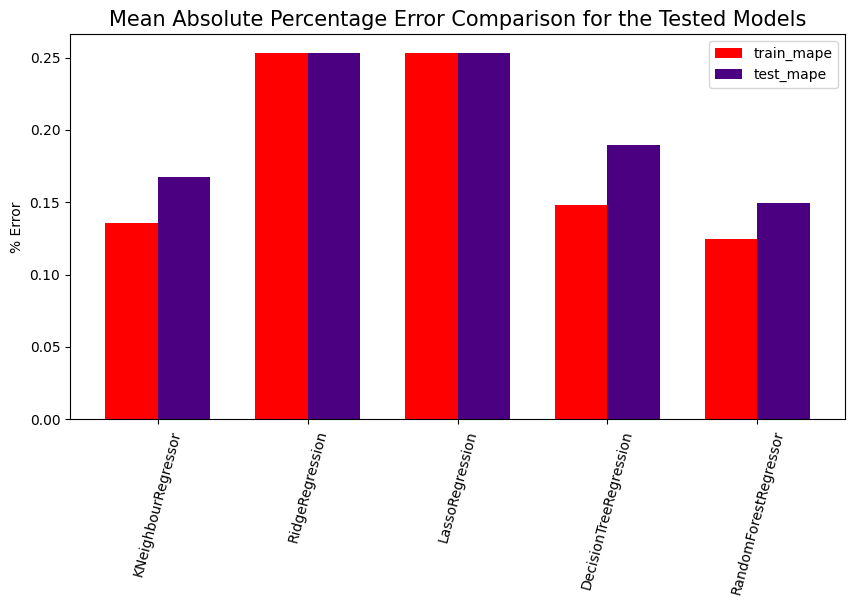

In [102]:
fig = plt.figure(figsize=(10,5))
plot1 = plt.bar(np.arange(5), model_output_with_KBest.train_mape, 0.35, color='red', label="train_mape")
plot2 = plt.bar(np.arange(5) + 0.35, model_output_with_KBest.test_mape, 0.35, color='indigo', label="test_mape")
plt.legend(loc='best')
plt.xticks(np.arange(5) + 0.35 / 2, tuple(model_output_with_KBest.Model.values), rotation=75)
plt.title("Mean Absolute Percentage Error Comparison for the Tested Models", fontsize=15)
plt.ylabel("% Error")
plt.show()


- I have trained 6 models such as knn, lasso, ridge, decision_tree, random_forest, and lightgbm and we can see that the best performing model is lightgbm.

- The mean absolute percentage error for the model is 0.12 and 0.14 for train and test respectively whereas the r2 scores are 0.93 and 0.87 respectively for train and test.

- I have used monotone to make sure the features which is correlated to the input and has an impact should affect during the model building.

- Linear models such as lasso and ridge are also performing well, but not able to capture the pattern and generating less r2 score. Also, the percentage error is very high as compared to other models.
